In [ ]:
### 1. import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Loading DataSet

In [ ]:
### Load Our Dataset

df=pd.read_csv('/content/drive/MyDrive/DataSets/ecommerce_furniture_dataset_2024.csv.csv')
# print(df.head())
# print(df.info())
# print(df.describe())
# print(df.isnull().sum())

# 2. Data Pre-Processing

In [ ]:
# Checking Overall Data

df.shape   # There are 2000 ROws and 5 Columns

(2000, 5)

In [ ]:
# Checking First few  columns

df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [ ]:
# Checking data types of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [ ]:
# Checking Statistical Values of Numerical Columns

df.describe()

,sold
count,2000.000000
mean,23.493500
std,254.094061
min,0.000000
25%,1.000000
50%,3.000000
75%,9.000000
max,10000.000000


In [ ]:
# Checking Duplicated Values
df.duplicated().sum()

# Dropping Duplicates
df.drop_duplicates(inplace =True)

In [ ]:
# Checking Missing Values
print(df.isnull().sum())

productTitle        0
originalPrice    1436
price               0
sold                0
tagText             2
dtype: int64


In [ ]:
# Clean 'originalPrice' column by removing '$' and converting to numeric before filling NaNs
df['originalPrice'] = df['originalPrice'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['originalPrice'] = pd.to_numeric(df['originalPrice'], errors='coerce') # Convert to numeric, coercing errors to NaN

# Filled 'originalPrice' column with Median Value
df['originalPrice'] = df['originalPrice'].fillna(df['originalPrice'].median())

# Print the number of missing values after filling
print("\nMissing values after filling 'originalPrice':")
print(df.isnull().sum())


Missing values after filling 'originalPrice':
productTitle     0
originalPrice    0
price            0
sold             0
tagText          2
dtype: int64


In [ ]:
# Filled 'Tagtext' Columns with 'Unknown'
df['tagText'].fillna('Unknown', inplace = True )

# Print After Filled Missing Values
print("Missing Values After 'tagTeaxt'\n", df.isnull().sum())


# Convert categorical variables (tagText) to numerical using one-hot encoding

df = pd.get_dummies(df, columns=['tagText'], prefix='tag')

Missing Values After 'tagTeaxt'
 productTitle     0
originalPrice    0
price            0
sold             0
tagText          0
dtype: int64


# 3. Exploratory Data Analysis(EDA)

In [ ]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style for better visuals
sns.set(style='whitegrid')

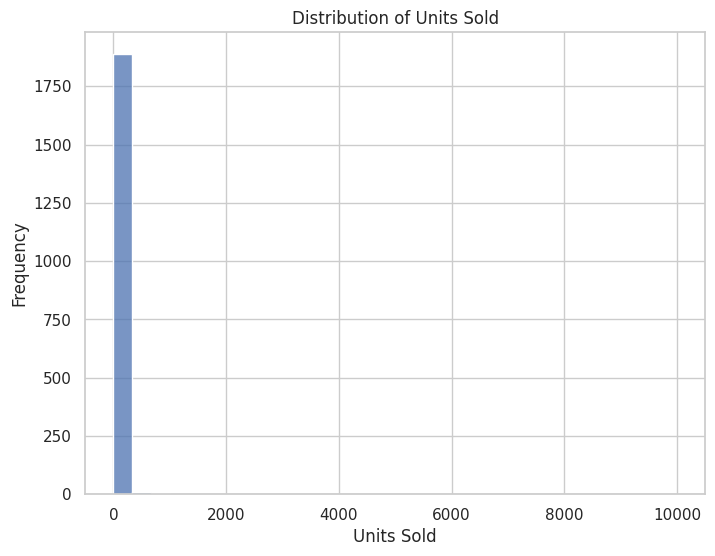

In [ ]:
# 1. Distribution of 'sold'
plt.figure(figsize=(8, 6))
sns.histplot(df['sold'], bins=30)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')

plt.show()

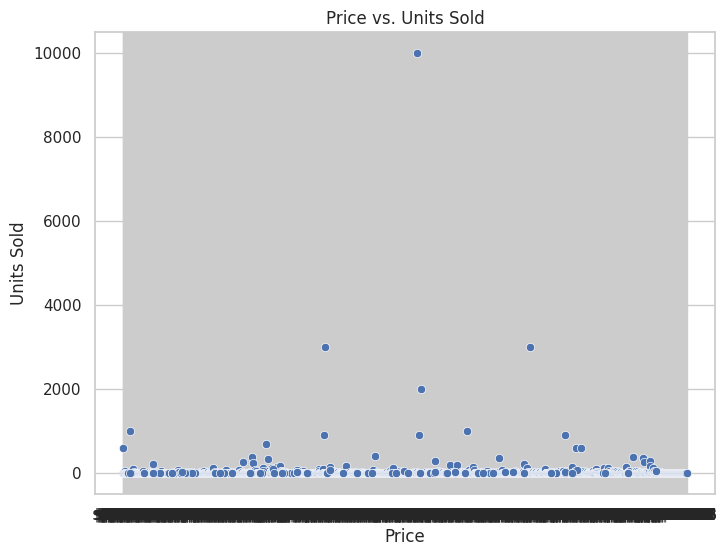

In [ ]:
# 2. Scatter plot of price vs. sold
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='sold', data=df)
plt.title('Price vs. Units Sold')
plt.xlabel('Price')
plt.ylabel('Units Sold')

plt.show()

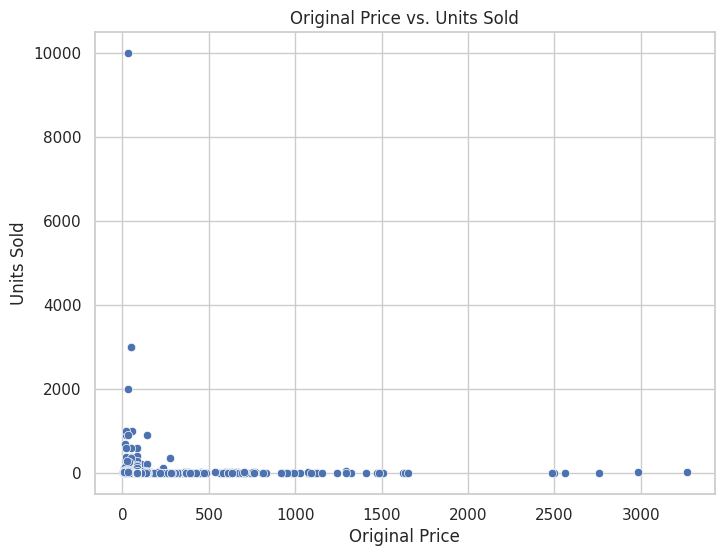

In [ ]:
# 3. Scatter plot of originalPrice vs. sold
plt.figure(figsize=(8, 6))
sns.scatterplot(x='originalPrice', y='sold', data=df)
plt.title('Original Price vs. Units Sold')
plt.xlabel('Original Price')
plt.ylabel('Units Sold')

plt.show()

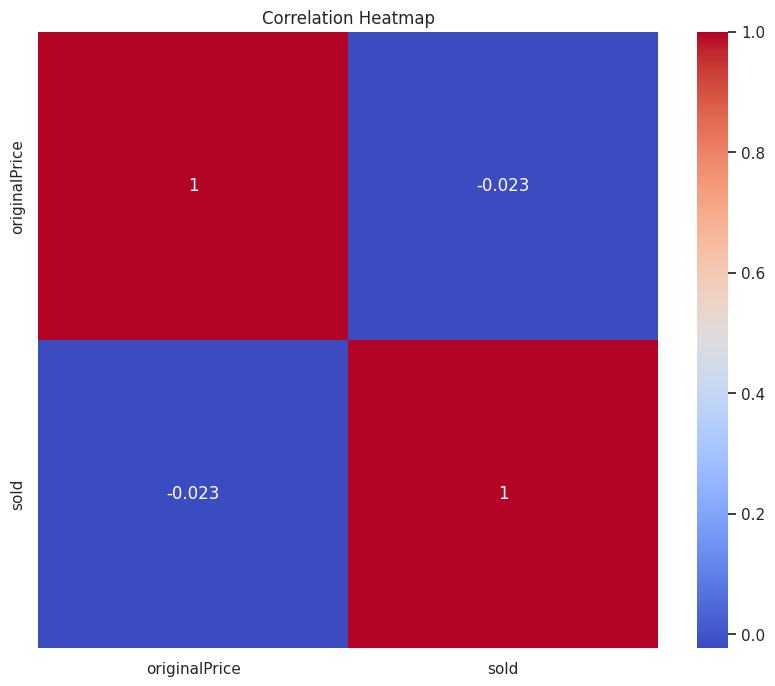

In [ ]:
# 4. Correlation heatmap (only numerical columns)
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()

# 4. Feature Engineering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# 1. Calculate discount percentage
# Clean 'price' column by removing '$' and converting to numeric
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df['discount_percentage'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100

# 2. Convert productTitle to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=50)  # Limit to top 50 words
tfidf_matrix = tfidf.fit_transform(df['productTitle'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Combine TF-IDF features with the original dataset
df = pd.concat([df.reset_index(drop=True), tfidf_df], axis=1)

# Drop the original productTitle column (no longer needed)
df = df.drop('productTitle', axis=1)

# Display the first few rows of the updated dataset
print(df.head())

   originalPrice   price  sold  tag_+Shipping: $1,097.18  \
0         87.155   46.79   600                     False   
1         87.155  169.72     0                     False   
2         78.400   39.46     7                     False   
3         87.155  111.99     0                     False   
4         48.820   21.37     1                     False   

   tag_+Shipping: $1,115.86  tag_+Shipping: $1,323.31  tag_+Shipping: $104.89  \
0                     False                     False                   False   
1                     False                     False                   False   
2                     False                     False                   False   
3                     False                     False                   False   
4                     False                     False                   False   

   tag_+Shipping: $106.05  tag_+Shipping: $106.13  tag_+Shipping: $109.18  \
0                   False                   False                   False  

In [ ]:
### 5. Model Selection & Training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Preparing features (X) and targeting (y)
# Inspecting columns for non-numeric values before dropping 'sold'
for col in df.columns:
    # Check if the column has object or string dtype and if 'Free shipping' is present
    if df[col].dtype == 'object':
        if df[col].astype(str).str.contains('Free shipping').any():
            print(f"Column '{col}' contains 'Free shipping' and is of object dtype.")


# 'Free shipping' is in a non-numerical column that should be excluded from X
# Update the list of columns to drop from X
columns_to_drop = ['sold']

# Checking if 'tagText' is the column causing the issue, as it was filled with 'Unknown'
# and might contain other strings that weren't handled.
if 'tagText' in df.columns:
    # Checking if 'tagText' should be excluded or encoded.
    # For simplicity, let's exclude it from the initial model training if it contains problematic strings.
    # If it's a significant feature, consider One-Hot Encoding or similar.
    # For this fix, we will assume 'tagText' contains the string and should be dropped from X.
    columns_to_drop.append('tagText')

# Adding any other identified non-numeric columns that shouldn't be in the model features
# Based on the error, it's likely a column other than the TF-IDF features or the original numerical ones.

X = df.drop(columns=columns_to_drop, axis=1)  # Drop 'sold' and any other problematic columns
y = df['sold']  # Target variable

# Ensure all remaining columns in X are numeric
# This step is a safeguard to catch any other non-numeric columns
for col in X.columns:
    try:
        # Attempt to convert to numeric, coercing errors will turn non-numeric to NaN
        X[col] = pd.to_numeric(X[col], errors='coerce')
    except Exception as e:
        print(f"Could not convert column {col} to numeric: {e}")

# Checking if any NaNs were introduced by the coercion
if X.isnull().sum().sum() > 0:
    print("NaNs introduced after converting columns to numeric. Check the data.")
    # You might need to impute NaNs or drop rows/columns with NaNs

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

print("Linear Regression Predictions (first 5):", lr_predictions[:5])
print("Random Forest Predictions (first 5):", rf_predictions[:5])

Linear Regression Predictions (first 5): [78.91588083 -3.13649132 34.89902123  3.42528285 17.79438292]
Random Forest Predictions (first 5): [5.33 7.49 0.47 4.2  2.44]


In [ ]:
### 6. Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate Linear Regression
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print("Linear Regression - MSE:", lr_mse)
print("Linear Regression - R-squared:", lr_r2)

# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print("Random Forest - MSE:", rf_mse)
print("Random Forest - R-squared:", rf_r2)

Linear Regression - MSE: 14090.95128134962
Linear Regression - R-squared: -0.09105171415416713
Random Forest - MSE: 12978.7093080725
Random Forest - R-squared: -0.004931658292190777


In [ ]:
# Step 7: Conclusion

print("\n=== Model Comparison and Conclusion ===")
print(f"Linear Regression - MSE: {lr_mse:.2f}, R-squared: {lr_r2:.4f}")
print(f"Random Forest - MSE: {rf_mse:.2f}, R-squared: {rf_r2:.4f}")

# Compare models based on MSE
if rf_mse < lr_mse:
    print("Random Forest performed better with a lower MSE, indicating more accurate predictions.")
else:
    print("Linear Regression performed better with a lower MSE.")


=== Model Comparison and Conclusion ===
Linear Regression - MSE: 14090.95, R-squared: -0.0911
Random Forest - MSE: 12978.71, R-squared: -0.0049
Random Forest performed better with a lower MSE, indicating more accurate predictions.


# END